---

# Introduzione ai big data e ai metodi computazionali

## Laurea in Sociologia



# Analisi dati - The Social Capital Atlas

Michele Tizzoni

---

In questo notebook useremo la libreria Pandas per esplorare i dati su cui si basano due studi pubblicati nel 2022:

- Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022). https://doi.org/10.1038/s41586-022-04996-4

- Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital II: determinants of economic connectedness. Nature 608, 122–134 (2022). https://doi.org/10.1038/s41586-022-04997-3

Gli autori di questi due studi hanno creato una piattaforma dove è possibile esplorare i dati: https://www.socialcapital.org/

Inoltre, i dati sono scaricabili tramite il portale Humanitarian Data Exchange: https://data.humdata.org/dataset/social-capital-atlas

### Economic connectedness

Gli autori introducono una nuova misura del capitale sociale, la **connessione economica**, che cattura la misura in cui gli individui con uno status socioeconomico (SES) elevato sono amici di persone con un basso SES. Gli autori definiscono la **connessione economica** come la frazione di amici di una persona che guadagnano più del reddito medio, divisa per 0.5 (la frazione prevista se le connessioni sociali fossero casuali). Ad esempio, se il 40% dei collegamenti di una persona che guadagna al di sotto del reddito mediano sono con persone che guadagnano al di sopra del reddito mediano, allora la connessione economica è pari a 0.8; in altre parole, gli amici ad alto reddito sono sottorappresentati del 20% nel gruppo di amicizia di quella persona.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./social_capital_county.csv')

In [4]:
df.head()

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [5]:
df.shape

(3089, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county                        3089 non-null   int64  
 1   county_name                   3089 non-null   object 
 2   num_below_p50                 3087 non-null   float64
 3   pop2018                       2983 non-null   float64
 4   ec_county                     3018 non-null   float64
 5   ec_se_county                  3018 non-null   float64
 6   child_ec_county               2729 non-null   float64
 7   child_ec_se_county            2729 non-null   float64
 8   ec_grp_mem_county             3012 non-null   float64
 9   ec_high_county                3018 non-null   float64
 10  ec_high_se_county             3018 non-null   float64
 11  child_high_ec_county          2729 non-null   float64
 12  child_high_ec_se_county       2729 non-null   float64
 13  ec_

Il file README contiene una descrizione di tutte le variabili. Qui ne riportiamo solo alcune:
* `county`: 5-digit county FIPS code.
* `county_name`: Name of the county and state.
* `pop_2018`: Population in 2018.
* `num_below_p50`: Number of children with below-national-median parental household income.


* `ec_county`: Baseline definition of economic connectedness.
* `ec_se_county`: The standard error of economic connectedness, incorporating both sampling error and error from the addition of noise to protect privacy.
* `child_ec_county`: Childhood economic connectedness.
* `child_ec_se_county`: The standard error of childhood economic connectedness.


* `clustering_county`: The average fraction of an individual’s friend pairs who are also friends with each other.
* `volunteering_rate_county`: The percentage of Facebook users who are members of a group which is predicted to be about ‘volunteering’.
* `civic_organizations_county`: The number of Facebook Pages predicted to be “Public Good” pages.



## Selezione

Proviamo a selezionare i dati corrispondenti ad un solo Stato alla volta. 

In [7]:
df_alabama = df[df['county_name'].str.contains(', Alabama')]

In [8]:
df_alabama

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1125,"Tuscaloosa, Alabama",19993.4240,206213.0,0.64775,0.00637,0.82072,0.01731,0.69414,1.23939,...,0.84589,0.96254,0.18635,-0.18066,0.02976,-0.11356,0.11285,0.99622,0.04510,0.01334
63,1127,"Walker, Alabama",9327.2041,64493.0,0.64082,0.00915,0.62895,0.02588,0.66590,1.06065,...,0.63792,0.73405,0.05898,-0.25173,0.01407,-0.08380,0.11568,0.99795,0.04503,0.01458
64,1129,"Washington, Alabama",2959.3025,16643.0,0.70414,0.01217,0.79620,0.03562,0.76392,1.05941,...,0.74944,0.77577,-0.00543,-0.23278,-0.06239,-0.07522,0.14909,0.99854,0.03182,0.01032
65,1131,"Wilcox, Alabama",3067.6301,10809.0,0.42162,0.01182,0.34766,0.02934,0.38919,0.96622,...,0.35417,0.58654,0.07042,-0.28760,0.01837,-0.04717,0.19053,0.99989,0.01901,0.01398


In [9]:
df_ny = df[df['county_name'].str.contains(', New York')]

In [10]:
df_ny

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
1806,36001,"Albany, New York",19730.4530,307426.0,0.87391,0.00696,1.07797,0.01660,0.93122,1.46298,...,1.10912,1.29037,0.09544,-0.10858,0.02809,-0.03760,0.09890,0.97807,0.08142,0.02288
1807,36003,"Allegany, New York",6156.7988,47025.0,0.77830,0.01046,0.72988,0.02813,0.77641,1.17528,...,0.69635,0.76427,0.05611,-0.16242,-0.04814,-0.07987,0.11585,0.99304,0.07390,0.02430
1808,36005,"Bronx, New York",306567.2200,1437872.0,0.68067,0.00582,0.64668,0.02103,0.71643,1.05966,...,0.62279,0.93848,0.07198,-0.05801,-0.03836,-0.02937,0.07162,0.93306,0.02304,0.00649
1809,36007,"Broome, New York",17773.2990,194402.0,0.81245,0.00765,0.95977,0.01779,0.83284,1.32753,...,0.96992,1.04441,0.11081,-0.17814,0.01046,-0.08075,0.10276,0.99236,0.07719,0.01678
1810,36009,"Cattaraugus, New York",10743.7870,77686.0,0.75653,0.00883,0.79904,0.02362,0.74164,1.17481,...,0.79991,0.83291,0.07970,-0.18230,0.00109,-0.10368,0.11800,0.99380,0.07353,0.01886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,36115,"Washington, New York",7010.4185,61828.0,0.83695,0.00946,0.90398,0.02653,0.86633,1.24874,...,0.89516,0.92800,0.10965,-0.14908,-0.00986,-0.06501,0.11018,0.98862,0.12213,0.01706
1864,36117,"Wayne, New York",9204.1865,90856.0,0.84524,0.00851,0.88739,0.02070,0.88855,1.28471,...,0.87898,0.92534,0.07851,-0.14922,-0.00957,-0.06865,0.10943,0.98842,0.09101,0.01574
1865,36119,"Westchester, New York",72428.8670,968815.0,0.81660,0.00707,1.12902,0.01667,0.83242,1.54990,...,1.17624,1.53775,0.15073,-0.07636,0.04014,-0.03532,0.09368,0.96771,0.05070,0.01653
1866,36121,"Wyoming, New York",4121.3638,40565.0,0.91835,0.01080,0.83573,0.03192,0.98200,1.24324,...,0.83491,0.85764,0.03437,-0.14278,-0.00098,-0.06918,0.12014,0.99257,0.06816,0.02165


In [11]:
alabama_ec_mean = df_alabama['ec_county'].mean()

ny_ec_mean = df_ny['ec_county'].mean()

In [12]:
alabama_ec_mean

0.5954700006060606

In [13]:
ny_ec_mean

0.8398341932258064

## GroupBy

Proviamo a calcolare la media dell'indice EC per ogni stato e ad ordinare gli stati in base al valore medio di EC.

In [14]:
def extract_state(x):
    
    s=x.split(',')
    
    state=s[1].lstrip()
    
    return state

In [15]:
extract_state('Wayne, New York')

'New York'

In [16]:
df.head()

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [17]:
df['state'] = df['county_name'].transform(extract_state)

In [18]:
df

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county,state
0,1001,"Autauga, Alabama",5922.39210,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518,Alabama
1,1003,"Baldwin, Alabama",15458.39600,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526,Alabama
2,1005,"Barbour, Alabama",4863.97360,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474,Alabama
3,1007,"Bibb, Alabama",3061.49340,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439,Alabama
4,1009,"Blount, Alabama",6740.91160,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,56037,"Sweetwater, Wyoming",2402.96900,44117.0,0.96235,0.01280,1.14781,0.02794,1.13449,1.32399,...,1.12907,0.09519,-0.12030,-0.02333,-0.08683,0.10809,0.99710,0.07321,0.01225,Wyoming
3085,56039,"Teton, Wyoming",783.24982,23059.0,1.07623,0.01744,1.23113,0.04692,1.13296,1.63551,...,1.35341,0.14337,-0.11958,0.07346,-0.07364,0.09253,0.98648,0.09747,0.03223,Wyoming
3086,56041,"Uinta, Wyoming",2174.06180,20609.0,0.95452,0.01404,1.04595,0.03455,0.92831,1.32040,...,1.06284,0.13816,-0.12194,0.00808,-0.06074,0.11204,0.99479,0.06942,0.01222,Wyoming
3087,56043,"Washakie, Wyoming",872.51544,8129.0,0.90667,0.01928,0.90794,0.04962,0.78223,1.29208,...,0.88589,0.06667,-0.20435,-0.02615,-0.06076,0.11592,0.99708,0.05843,0.03512,Wyoming


In [19]:
state_average = df.groupby(['state'])['ec_county'].mean()

In [20]:
type(state_average)

pandas.core.series.Series

In [21]:
state_average

state
Alabama                 0.595470
Alaska                  0.988170
Arizona                 0.691928
Arkansas                0.689512
California              0.807316
Colorado                0.951726
Connecticut             0.948693
Delaware                0.781613
District of Columbia    0.996160
Florida                 0.664965
Georgia                 0.607236
Hawaii                  1.041255
Idaho                   0.852070
Illinois                0.840682
Indiana                 0.823437
Iowa                    0.984454
Kansas                  0.940320
Kentucky                0.825159
Louisiana               0.699572
Maine                   0.841684
Maryland                0.948747
Massachusetts           0.928555
Michigan                0.803008
Minnesota               1.047906
Mississippi             0.634397
Missouri                0.845587
Montana                 0.895603
Nebraska                0.988439
Nevada                  0.838435
New Hampshire           1.087421
New 

In [22]:
df_state=state_average.to_frame()

In [24]:
df_state.reset_index()

,state,ec_county
0,Alabama,0.595470
1,Alaska,0.988170
2,Arizona,0.691928
3,Arkansas,0.689512
4,California,0.807316
5,Colorado,0.951726
6,Connecticut,0.948693
7,Delaware,0.781613
8,District of Columbia,0.996160
9,Florida,0.664965


In [25]:
df_state.sort_values(by='ec_county', ascending=False)

,ec_county
state,
New Hampshire,1.087421
North Dakota,1.054993
Minnesota,1.047906
Hawaii,1.041255
Rhode Island,1.023338
Utah,1.021165
District of Columbia,0.996160
Nebraska,0.988439
Alaska,0.988170


## Grafico

Costruiamo un grafico che mette in relazione la connessione economica e il tasso di volontariato nelle contee americane. 

Text(0, 0.5, 'Volunteering rate')

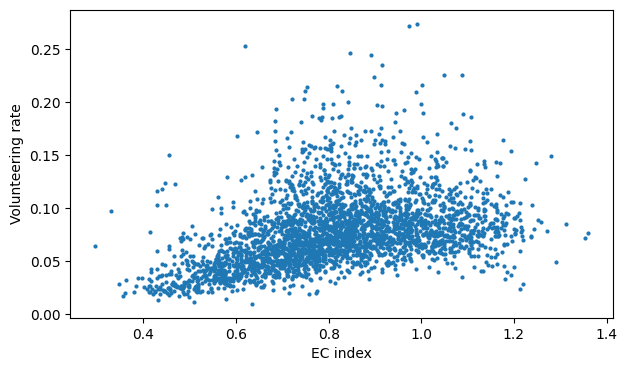

In [26]:
plt.figure(figsize=(7,4))

plt.plot( df['ec_county'], df['volunteering_rate_county'], 'o', markersize=2)

plt.xlabel('EC index')
plt.ylabel('Volunteering rate')

In [27]:
df['ec_county'].mean()

0.8144641210868125

In [28]:
df['volunteering_rate_county'].mean()

0.07806774976413079

In [29]:
df[ df['volunteering_rate_county'] > 0.23 ]

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county,state
885,20005,"Atchison, Kansas",2014.43800,16363.0,0.91581,0.01546,0.85604,0.03860,0.88139,1.38866,...,0.92255,0.05827,-0.21178,0.00778,-0.07530,0.125880,0.996440,0.235080,0.021140,Kansas
894,20023,"Cheyenne, Kansas",535.92914,2677.0,0.99049,0.03573,NaN,NaN,1.14147,1.38989,...,NaN,0.00305,-0.14576,NaN,NaN,0.114460,0.996320,0.273580,0.043560,Kansas
918,20071,"Greeley, Kansas",211.96527,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.121041,0.997069,0.287265,0.055153,Kansas
1259,26067,"Ionia, Michigan",5954.51950,64176.0,0.84526,0.01004,0.83211,0.02246,0.90689,1.28009,...,0.85643,0.07449,-0.16478,-0.00638,-0.07602,0.114260,0.986490,0.246370,0.014950,Michigan
1291,26131,"Ontonagon, Michigan",715.34192,5968.0,0.89140,0.02234,NaN,NaN,0.89052,1.22059,...,NaN,-0.01397,-0.15386,NaN,NaN,0.150630,0.996390,0.243660,0.038100,Michigan
2575,48155,"Foard, Texas",325.28586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.131277,0.997529,0.308736,0.045566,Texas
2614,48235,"Irion, Texas",219.45839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.097053,0.989378,0.239626,0.024603,Texas
2663,48341,"Moore, Texas",3741.33450,21801.0,0.62012,0.01345,0.83199,0.03497,0.77468,1.09637,...,0.93501,0.13399,-0.19197,0.07184,-0.11111,0.112190,0.997360,0.252610,0.011670,Texas
2713,48447,"Throckmorton, Texas",366.39597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.105239,0.996970,0.244292,0.028432,Texas
3079,56027,"Niobrara, Wyoming",268.87433,NaN,0.97450,0.02936,NaN,NaN,0.89632,1.32611,...,NaN,0.09905,-0.12471,NaN,NaN,0.112420,0.996390,0.271360,0.036680,Wyoming


# Parte 2: Introduzione a Geopandas

Geopandas è una libreria Python chec consente l'analisi di dati georeferenziati.

Per installare Geopandas:

Anaconda:

`conda install geopandas`

e poi

`conda install -c conda-forge descartes`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user geopandas descartes ```

In [30]:
import geopandas as gpd

Geopandas consente di leggere file in formato "shapefile". I file di questo tipo si possono scaricare dai repository degli istituti di statistica nazionali.

Per esempio proviamo a scaricare 


In [31]:
usa = gpd.read_file('./cb_2018_us_county_5m/cb_2018_us_county_5m.shp')

In [32]:
usa.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


<Axes: >

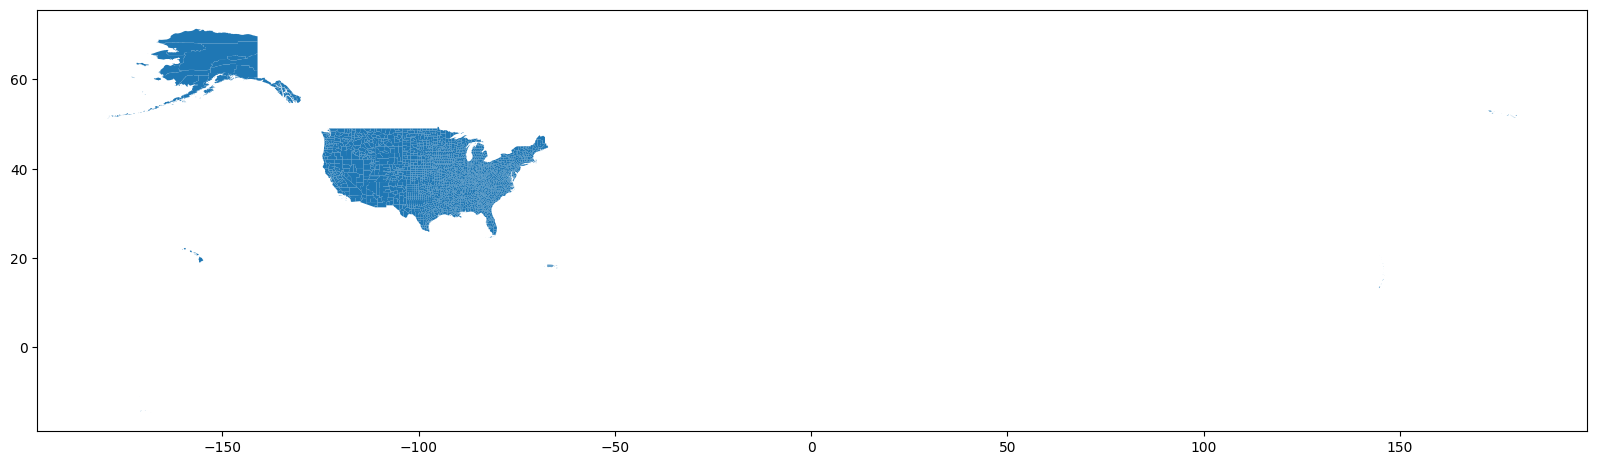

In [33]:
usa.plot(figsize=(20,10))

In [ ]:
usa.info()

In [34]:
geo_alabama = usa[ usa['STATEFP']=='01' ]

<Axes: >

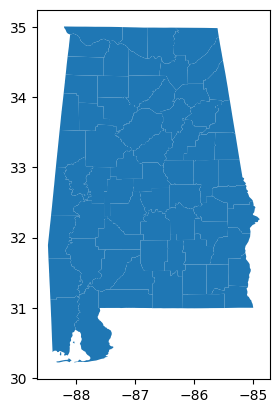

In [35]:
geo_alabama.plot()

In [36]:
geo_alabama

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
40,01,003,00161527,0500000US01003,01003,Baldwin,06,4117546676,1133055836,"POLYGON ((-88.02927 30.22271, -88.02399 30.230..."
41,01,059,00161555,0500000US01059,01059,Franklin,06,1641841406,32643981,"POLYGON ((-88.16591 34.38093, -88.16563 34.383..."
104,01,061,00161556,0500000US01061,01061,Geneva,06,1487897666,11578163,"POLYGON ((-86.19348 31.19221, -86.12548 31.192..."
113,01,057,00161554,0500000US01057,01057,Fayette,06,1625693290,4330881,"POLYGON ((-87.95179 33.91993, -87.86324 33.919..."
386,01,111,00161582,0500000US01111,01111,Randolph,06,1503615935,9285419,"POLYGON ((-85.65047 33.30615, -85.64144 33.305..."
...,...,...,...,...,...,...,...,...,...,...
3035,01,015,00161533,0500000US01015,01015,Calhoun,06,1569189622,16627597,"POLYGON ((-86.14371 33.70913, -86.12388 33.710..."
3043,01,001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961,"POLYGON ((-86.91759 32.66417, -86.81657 32.660..."
3044,01,005,00161528,0500000US01005,01005,Barbour,06,2292144655,50538698,"POLYGON ((-85.74142 31.61961, -85.72983 31.632..."
3073,01,021,00161536,0500000US01021,01021,Chilton,06,1794477075,20592144,"POLYGON ((-87.01916 32.83703, -86.87612 32.836..."


In [38]:
geo_alabama['county'] = geo_alabama['GEOID'].transform(int)

/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
geo_alabama

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county
40,01,003,00161527,0500000US01003,01003,Baldwin,06,4117546676,1133055836,"POLYGON ((-88.02927 30.22271, -88.02399 30.230...",1003
41,01,059,00161555,0500000US01059,01059,Franklin,06,1641841406,32643981,"POLYGON ((-88.16591 34.38093, -88.16563 34.383...",1059
104,01,061,00161556,0500000US01061,01061,Geneva,06,1487897666,11578163,"POLYGON ((-86.19348 31.19221, -86.12548 31.192...",1061
113,01,057,00161554,0500000US01057,01057,Fayette,06,1625693290,4330881,"POLYGON ((-87.95179 33.91993, -87.86324 33.919...",1057
386,01,111,00161582,0500000US01111,01111,Randolph,06,1503615935,9285419,"POLYGON ((-85.65047 33.30615, -85.64144 33.305...",1111
...,...,...,...,...,...,...,...,...,...,...,...
3035,01,015,00161533,0500000US01015,01015,Calhoun,06,1569189622,16627597,"POLYGON ((-86.14371 33.70913, -86.12388 33.710...",1015
3043,01,001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961,"POLYGON ((-86.91759 32.66417, -86.81657 32.660...",1001
3044,01,005,00161528,0500000US01005,01005,Barbour,06,2292144655,50538698,"POLYGON ((-85.74142 31.61961, -85.72983 31.632...",1005
3073,01,021,00161536,0500000US01021,01021,Chilton,06,1794477075,20592144,"POLYGON ((-87.01916 32.83703, -86.87612 32.836...",1021


In [37]:
df_alabama.head()

,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [40]:
geo_alabama = pd.merge(geo_alabama, df_alabama, on='county', how='inner')

In [42]:
geo_alabama.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   STATEFP                       67 non-null     object  
 1   COUNTYFP                      67 non-null     object  
 2   COUNTYNS                      67 non-null     object  
 3   AFFGEOID                      67 non-null     object  
 4   GEOID                         67 non-null     object  
 5   NAME                          67 non-null     object  
 6   LSAD                          67 non-null     object  
 7   ALAND                         67 non-null     int64   
 8   AWATER                        67 non-null     int64   
 9   geometry                      67 non-null     geometry
 10  county                        67 non-null     int64   
 11  county_name                   67 non-null     object  
 12  num_below_p50                 67 non-null   

<Axes: >

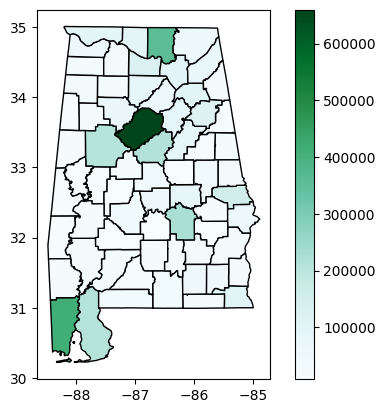

In [43]:
geo_alabama.plot(column='pop2018', cmap='BuGn', edgecolor='k', legend=True)

<Axes: >

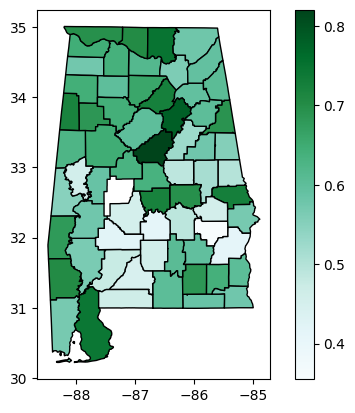

In [44]:
geo_alabama.plot(column='ec_county', cmap='BuGn', edgecolor='k', legend=True)